In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [248]:
#pip install xgboost

In [249]:
#from numpy import loadtxt
#from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

In [250]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [251]:
LeadScore_df = pd.read_csv("Lead-analysis/2022_02_02_v4.csv", encoding='latin-1')
LeadScore_df

,Check LLC in Name,Email Domain,Is_Submitted,LS Amount to Borrow,LS GAS,LS GAS Grouped,LS Months in Business,LS Self Graded Credit,LS_State,Web_Ad_Outlet__c,Web_Ad_Outlet_Source__c
0,1,@DIFMEBEAUTYBAR.COM,1,10000,250000,$200k-$500k,13.0,4,40,1101,Lending Tree
1,1,@GMAIL.COM,0,12500,506000,$500k-$1mm,13.0,3,40,1101,Lending Tree
2,1,@GMAIL.COM,1,65000,100000,$100k-$200k,13.0,4,17,1101,Lending Tree
3,1,@GMAIL.COM,1,10000,100000,$100k-$200k,12.0,4,1,1101,Lending Tree
4,0,@GMAIL.COM,0,10000,100000,$100k-$200k,13.0,4,17,1101,Lending Tree
...,...,...,...,...,...,...,...,...,...,...,...
16911,0,@ICLOUD.COM,0,20000,405000,$200k-$500k,171.0,4,9,1101,Lending Tree
16912,1,@MONOGRAMJUNKIE.COM,0,10000,400000,$200k-$500k,178.0,4,17,1101,Lending Tree
16913,1,@GOVERNMENTCONTRACTSLLC.COM,0,15000,150000,$100k-$200k,209.0,2,32,1101,Lending Tree
16914,0,@AOL.COM,0,50000,125000,$100k-$200k,217.0,3,25,1101,Lending Tree


In [252]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16916 entries, 0 to 16915
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Check LLC in Name        16916 non-null  int64  
 1   Email Domain             16916 non-null  object 
 2   Is_Submitted             16916 non-null  int64  
 3   LS Amount to Borrow      16916 non-null  int64  
 4   LS GAS                   16916 non-null  int64  
 5   LS GAS Grouped           16916 non-null  object 
 6   LS Months in Business    15325 non-null  float64
 7   LS Self Graded Credit    16916 non-null  int64  
 8   LS_State                 16916 non-null  int64  
 9   Web_Ad_Outlet__c         16916 non-null  int64  
 10  Web_Ad_Outlet_Source__c  16916 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 1.4+ MB


In [253]:
LeadScore_df.isnull().sum()

Check LLC in Name             0
Email Domain                  0
Is_Submitted                  0
LS Amount to Borrow           0
LS GAS                        0
LS GAS Grouped                0
LS Months in Business      1591
LS Self Graded Credit         0
LS_State                      0
Web_Ad_Outlet__c              0
Web_Ad_Outlet_Source__c       0
dtype: int64

In [254]:
LeadScore_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [255]:
#LeadScore_df.rename(columns=lambda x:x.strip())

In [256]:
#LeadScore_df.columns = LeadScore_df.str.replace(r'_x$','')

In [257]:
#LeadScore_df.rename(columns=lambda x: x.replace('_x$',''), inplace=True)

In [258]:
LeadScore_df.columns

Index(['Check_LLC_in_Name', 'Email_Domain', 'Is_Submitted',
       'LS_Amount_to_Borrow', 'LS_GAS', 'LS_GAS_Grouped',
       'LS_Months_in_Business', 'LS_Self_Graded_Credit', 'LS_State',
       'Web_Ad_Outlet__c', 'Web_Ad_Outlet_Source__c'],
      dtype='object')

In [259]:
LeadScore_df.groupby('Is_Submitted').size()

Is_Submitted
0    13863
1     3053
dtype: int64

In [260]:
LeadScore_df.groupby('LS_Amount_to_Borrow').sum()['Is_Submitted'].round(decimals=2)

LS_Amount_to_Borrow
1           0
2           1
10          0
50          0
100         0
           ..
18000000    0
30000000    0
45000000    0
50000000    0
70000000    0
Name: Is_Submitted, Length: 265, dtype: int64

In [261]:
LeadScore_df.groupby('LS_GAS').sum()['Is_Submitted'].round(decimals=2)

LS_GAS
60000        654
100000        90
100008         1
100101         1
100208         0
            ... 
480039864      0
600000000      0
653081076      0
720000000      0
942840000      0
Name: Is_Submitted, Length: 872, dtype: int64

In [262]:
#LeadScore_df['Requested_Amount'] = LeadScore_df['Requested_Amount'].str.replace(',','')

In [263]:
#LeadScore_df.to_csv('Lead_Data.csv', index = False)

In [264]:
LeadScore_df.groupby('Is_Submitted').mean()['LS_Self_Graded_Credit'].round(decimals=2)

Is_Submitted
0    3.01
1    3.14
Name: LS_Self_Graded_Credit, dtype: float64

In [265]:
LeadScore_df.groupby('Web_Ad_Outlet_Source__c').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet_Source__c
Digital - Affiliate    237
Digital-Organic        528
Digital-PPC            173
Direct                 713
Lending Tree           974
Strategic Partners     428
Name: Is_Submitted, dtype: int64

In [266]:
LeadScore_df = LeadScore_df.drop(['LS_GAS_Grouped','LS_Months_in_Business'], axis=1)
LeadScore_df.sample(10)

,Check_LLC_in_Name,Email_Domain,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,LS_State,Web_Ad_Outlet__c,Web_Ad_Outlet_Source__c
3831,0,@ROSENTHAL-INSURANCE.COM,1,7500,60000,4,47,1249,Strategic Partners
2572,1,@ICLOUD.COM,0,37500,350000,3,41,5071,Direct
2835,0,@ICLOUD.COM,0,100000,60000,2,8,5071,Direct
14189,1,@YAHOO.COM,0,25000,125000,4,37,1101,Lending Tree
8710,0,@NCCRAY.COM,0,500000,1740000,2,47,1280,Strategic Partners
4749,1,@GMAIL.COM,1,17500,150000,3,47,1119,Digital - Affiliate
1849,1,@YAHOO.COM,0,37500,150000,4,47,1119,Digital - Affiliate
9503,1,@KRAHNHOUSING.COM,0,17500,60000,4,47,1267,Strategic Partners
7133,1,@GMAIL.COM,0,17500,60000,4,28,5000,Direct
4917,1,@GMAIL.COM,0,20000,840000,4,47,1280,Strategic Partners


In [267]:
LeadScore_mask = (LeadScore_df.Email_Domain == "@GMAIL.COM") | (LeadScore_df.Email_Domain == '@YAHOO.COM')

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered.sample(10)

,Check_LLC_in_Name,Email_Domain,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,LS_State,Web_Ad_Outlet__c,Web_Ad_Outlet_Source__c
12873,0,@YAHOO.COM,0,50000,250000,2,31,1101,Lending Tree
8677,1,@GMAIL.COM,0,37500,60000,1,47,1267,Strategic Partners
12652,1,@GMAIL.COM,0,100000,150000,4,28,1101,Lending Tree
16186,1,@GMAIL.COM,0,100000,125000,4,9,1101,Lending Tree
12053,1,@YAHOO.COM,0,50000,1440000,4,42,1101,Lending Tree
5314,1,@GMAIL.COM,0,37500,150000,4,47,1011,Digital-PPC
6183,1,@GMAIL.COM,1,37500,350000,4,3,5081,Direct
9656,0,@YAHOO.COM,1,17500,350000,3,47,5051,Direct
2406,0,@GMAIL.COM,0,17500,150000,4,47,1000,Digital-Organic
11119,0,@YAHOO.COM,0,15000,130000,4,32,1101,Lending Tree


In [268]:
LeadScore_df['Email_Domain'] = LeadScore_df['Email_Domain'].apply(lambda x:0 if x == '@GMAIL.COM' else 1 if x=='@YAHOO.COM' else 2)

In [269]:
#LeadScore_df['Email_Domain']=LeadScore_df['Email_Domain'].map(lambda x:x == 0 if (x != '@GMAIL.COM') | (x !='@YAHOO.COM') else x)

In [270]:
#LeadScore_df =LeadScore_df.dropna(subset = ['2_Digit_NAICS_Code'], axis = 0)

In [271]:
LeadScore_df.groupby('Web_Ad_Outlet__c').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet__c
1000    528
1010      4
1011    169
1101    974
1118     37
1119    200
1212      1
1213      3
1220      0
1226      9
1230      0
1240     24
1241      5
1242      3
1249     58
1265      0
1267    182
1280    143
5000     27
5028     33
5051    319
5055     19
5059      1
5061     81
5071     89
5081     64
5190     22
5192     58
Name: Is_Submitted, dtype: int64

In [272]:
#LeadScore_df =LeadScore_df.dropna(subset = ['State'], axis = 0)

In [273]:
from sklearn.preprocessing import LabelEncoder

#Amount_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0, '$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

Source_dict = {1000:0, 1010:1, 1011:2, 1101:3, 1118:4,
              1119:5, 1212:6 , 1213:7, 1220:8, 1226:9 ,1230:10 ,1240:11 , 1241:12, 1242:13, 1249:14 ,1265:16, 1267:17,
               1280:18, 5000:19, 5028:20, 5051:21, 5081:22, 5190:23, 5055:24 ,5061:25, 5071:26, 5059:27, 5192:28}

LeadScore_df['Web_Ad_Outlet__c'].replace(Source_dict, inplace=True)


Outlet_dict = {"Digital - Affiliate":0, "Digital-Organic":1, "Direct":2 ,"Digital-PPC":3, "Lending Tree":4, 'Strategic Partners':5}
             
LeadScore_df['Web_Ad_Outlet_Source__c'].replace(Outlet_dict, inplace=True)



LeadScore_df.sample(20)

,Check_LLC_in_Name,Email_Domain,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,LS_State,Web_Ad_Outlet__c,Web_Ad_Outlet_Source__c
11625,1,2,1,50000,350000,4,40,3,4
10442,0,0,0,7500,60000,4,47,0,1
1538,0,1,0,75000,60000,3,47,2,3
2916,0,2,0,75000,60000,3,47,2,3
10879,0,2,0,17500,60000,4,47,0,1
16627,1,0,0,50000,174000,4,9,3,4
9310,0,2,0,37500,1000000,1,47,0,1
5276,1,1,0,17500,60000,3,40,22,2
3797,0,2,1,7500,150000,3,47,14,5
7943,1,2,1,100000,60000,4,47,4,0


In [274]:
LeadScore_df.dtypes

Check_LLC_in_Name          int64
Email_Domain               int64
Is_Submitted               int64
LS_Amount_to_Borrow        int64
LS_GAS                     int64
LS_Self_Graded_Credit      int64
LS_State                   int64
Web_Ad_Outlet__c           int64
Web_Ad_Outlet_Source__c    int64
dtype: object

In [277]:
LeadScore_df.to_csv('Train4-27leads.csv', index = False)

In [276]:
#pd.options.display.float_format = '{:,.2f}'.format

In [245]:
LeadScore_df.describe()

,Check_LLC_in_Name,Email_Domain,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,LS_State,Web_Ad_Outlet__c,Web_Ad_Outlet_Source__c
count,16916.000000,16916.000000,16916.000000,1.691600e+04,1.691600e+04,16916.000000,16916.000000,16916.000000,16916.000000
mean,0.532573,0.737408,0.180480,9.915921e+04,6.533397e+05,3.035647,32.348960,9.698747,2.971447
std,0.498953,0.895998,0.384598,1.010752e+06,1.240882e+07,0.988240,16.508859,9.255709,1.545663
min,0.000000,0.000000,0.000000,1.000000e+00,6.000000e+04,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.750000e+04,6.000000e+04,2.000000,16.000000,3.000000,2.000000
50%,1.000000,0.000000,0.000000,3.750000e+04,1.500000e+05,3.000000,40.000000,3.000000,4.000000
75%,1.000000,2.000000,0.000000,7.500000e+04,3.500000e+05,4.000000,47.000000,18.000000,4.000000
max,1.000000,2.000000,1.000000,7.000000e+07,9.428400e+08,4.000000,47.000000,28.000000,5.000000


In [278]:
Submitted = (sum(LeadScore_df["Is_Submitted"])/len(LeadScore_df['Is_Submitted'].index))*100
Submitted

18.048001891700167

In [279]:
Lead_cluster_data = LeadScore_df.groupby(['Is_Submitted']).mean()
Lead_cluster_data

,Check_LLC_in_Name,Email_Domain,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,LS_State,Web_Ad_Outlet__c,Web_Ad_Outlet_Source__c
Is_Submitted,,,,,,,,
0,0.496790,0.724807,110799.867489,729620.843324,3.013489,32.164322,9.844117,3.012046
1,0.695054,0.794628,46301.557157,306963.879135,3.136259,33.187357,9.038651,2.787095


In [280]:
LeadScore_df.corr()

,Check_LLC_in_Name,Email_Domain,Is_Submitted,LS_Amount_to_Borrow,LS_GAS,LS_Self_Graded_Credit,LS_State,Web_Ad_Outlet__c,Web_Ad_Outlet_Source__c
Check_LLC_in_Name,1.000000,-0.024902,0.152824,-0.043612,-0.028954,0.058492,-0.056640,0.068142,-0.124397
Email_Domain,-0.024902,1.000000,0.029970,0.018534,0.014559,-0.064674,0.065535,0.014449,0.009185
Is_Submitted,0.152824,0.029970,1.000000,-0.024542,-0.013100,0.047779,0.023833,-0.033469,-0.055973
LS_Amount_to_Borrow,-0.043612,0.018534,-0.024542,1.000000,0.219066,-0.045333,0.038853,0.038545,0.076023
LS_GAS,-0.028954,0.014559,-0.013100,0.219066,1.000000,-0.005993,0.026480,0.024083,0.042320
LS_Self_Graded_Credit,0.058492,-0.064674,0.047779,-0.045333,-0.005993,1.000000,0.028263,-0.029145,-0.123146
LS_State,-0.056640,0.065535,0.023833,0.038853,0.026480,0.028263,1.000000,-0.108604,-0.148744
Web_Ad_Outlet__c,0.068142,0.014449,-0.033469,0.038545,0.024083,-0.029145,-0.108604,1.000000,0.029751
Web_Ad_Outlet_Source__c,-0.124397,0.009185,-0.055973,0.076023,0.042320,-0.123146,-0.148744,0.029751,1.000000


In [ ]:
#.to_csv('Train4-11LN.csv', index = False)

In [281]:
X = LeadScore_df.drop('Is_Submitted', axis =1)

y = LeadScore_df[['Is_Submitted']]

In [282]:
X.isnull().sum()

Check_LLC_in_Name          0
Email_Domain               0
LS_Amount_to_Borrow        0
LS_GAS                     0
LS_Self_Graded_Credit      0
LS_State                   0
Web_Ad_Outlet__c           0
Web_Ad_Outlet_Source__c    0
dtype: int64

In [283]:
X.dtypes

Check_LLC_in_Name          int64
Email_Domain               int64
LS_Amount_to_Borrow        int64
LS_GAS                     int64
LS_Self_Graded_Credit      int64
LS_State                   int64
Web_Ad_Outlet__c           int64
Web_Ad_Outlet_Source__c    int64
dtype: object

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [508]:
#X_train.to_csv('Train4-11LN.csv', index = False)

In [285]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [286]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),X,y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)


[learning_curve] Training set sizes: [  177   536   895  1253  1612  1971  2330  2689  3047  3406  3765  4124
  4482  4841  5200  5559  5918  6276  6635  6994  7353  7712  8070  8429
  8788  9147  9505  9864 10223 10582 10941 11299 11658 12017 12376 12735
 13093 13452 13811 14170 14528 14887 15246 15605 15964 16322 16681 17040
 17399 17758]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.8min finished


In [87]:
train_mean = np.mean(train_scores, axis =1)
train_mean

array([0.97231638, 0.96641791, 0.95430168, 0.94820431, 0.94540943,
       0.94393709, 0.94592275, 0.9470807 , 0.94686577, 0.94524369,
       0.94430279, 0.94224054, 0.94252566, 0.94125181, 0.93971154,
       0.93917971, 0.93928692, 0.93787444, 0.93787491, 0.93650272,
       0.93487012, 0.93497147, 0.93385378, 0.9330051 , 0.93166818,
       0.93079698, 0.92932141, 0.92897405, 0.92713489, 0.92546778,
       0.92479664, 0.92350651, 0.92224224, 0.92225181, 0.923085  ,
       0.9241225 , 0.92534942, 0.92619685, 0.92771704, 0.92941426,
       0.93102974, 0.93215557, 0.93351043, 0.93455944, 0.93545477,
       0.9367602 , 0.93763563, 0.93838615, 0.93918041, 0.94012839])

In [88]:
train_std = np.std(train_scores, axis=1)
train_std

array([0.00169492, 0.00083435, 0.00407323, 0.00529931, 0.00435128,
       0.004873  , 0.00368699, 0.00309381, 0.00159739, 0.001139  ,
       0.00107594, 0.00160039, 0.00192241, 0.00213716, 0.00241918,
       0.00189772, 0.00261017, 0.00205841, 0.00200038, 0.00210763,
       0.00229306, 0.00252187, 0.00264658, 0.00241396, 0.00229411,
       0.00223195, 0.00254194, 0.00284013, 0.00266327, 0.00293439,
       0.00334347, 0.0040652 , 0.00407482, 0.00308617, 0.00183455,
       0.00209794, 0.00264625, 0.00381086, 0.00420517, 0.00414067,
       0.00403819, 0.00364557, 0.00351828, 0.00328195, 0.00320917,
       0.00316007, 0.00299323, 0.00276239, 0.00265266, 0.00254441])

In [89]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([0.73120886, 0.76809173, 0.76956052, 0.77315802, 0.77528612,
       0.77295449, 0.77467832, 0.77538679, 0.77574241, 0.78207732,
       0.77503226, 0.77776965, 0.77873239, 0.77736392, 0.77792134,
       0.78050621, 0.78060748, 0.77716131, 0.77498191, 0.77376546,
       0.77229539, 0.77462715, 0.77711085, 0.77594525, 0.77716144,
       0.7756917 , 0.77771935, 0.77797231, 0.7744249 , 0.76672061,
       0.77021793, 0.77483012, 0.77361359, 0.77518488, 0.7753366 ,
       0.74614268, 0.77609666, 0.79018698, 0.79419106, 0.80280756,
       0.79566087, 0.79910784, 0.80148943, 0.80346612, 0.80255393,
       0.80442938, 0.80503751, 0.80483495, 0.80488566, 0.80508817])

In [90]:
test_std = np.std(test_scores, axis=1)
test_std

array([0.09942559, 0.06775075, 0.0632142 , 0.06523974, 0.06870565,
       0.07462047, 0.07294982, 0.07686516, 0.07432428, 0.06645896,
       0.07291312, 0.07109919, 0.0718327 , 0.07381429, 0.07090298,
       0.07125319, 0.0706469 , 0.06369851, 0.06841942, 0.0720446 ,
       0.07185632, 0.07478338, 0.06929415, 0.06819827, 0.06986612,
       0.07558281, 0.0698521 , 0.07379191, 0.06544424, 0.06897618,
       0.0672721 , 0.06705849, 0.06464088, 0.07108053, 0.07077014,
       0.09777025, 0.06859367, 0.06244903, 0.06628517, 0.04583897,
       0.04676672, 0.04159404, 0.03915131, 0.03943897, 0.03964365,
       0.04166203, 0.04252777, 0.04112274, 0.04127572, 0.04146449])

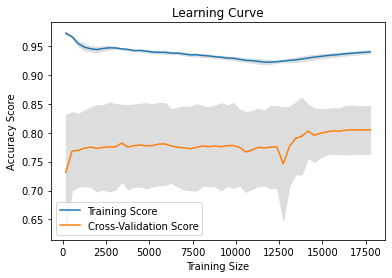

In [91]:
plt.plot(train_sizes, train_mean, label= 'Training Score')
plt.plot(train_sizes, test_mean, label= 'Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

In [287]:
import imblearn

In [288]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
# fit predictor and target 

variablex_ros, y_ros = ros.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'Is_Submitted': 1})
Resample dataset shape Counter({'Is_Submitted': 1})


In [289]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({'Is_Submitted': 1})


In [290]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                11841
Model:                            GLM   Df Residuals:                    11832
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5398.4
Date:                Wed, 27 Apr 2022   Deviance:                       10797.
Time:                        10:53:23   Pearson chi2:                 1.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0964      0.113    -18.515      0.000      -2.318      -1.874
x1             0.7999      0.052     15.449      0.000       0.698       0.901
x2             0.1868      0.054      3.453      0.001       0.081       0.293
x3          -170.6178     28.861     -5.912      0.000    -227.185    -114.051
x4            -5.5111     10.196     -0.540      0.589     -25.496      14.473
x5             0.2292      0.077      2.974      0.003       0.078       0.380
x6             0.2128      0.073      2.908      0.004       0.069       0.356
x7            -0.2764      0.075     -3.694      0.000      -0.423      -0.130
x8            -0.0547      0.083     -0.661      0.508      -0.217       0.107
==============================================================================
"""

In [291]:
X_train.shape, y_train.shape

((11841, 8), (11841, 1))

In [292]:
X_test.shape, y_test.shape

((5075, 8), (5075, 1))

In [293]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.016960
Feature 1: 0.000894
Feature 2: 0.005751
Feature 3: 0.011393
Feature 4: 0.003483
Feature 5: 0.000000
Feature 6: 0.010977
Feature 7: 0.000000


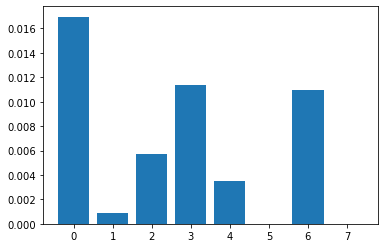

In [294]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [295]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [296]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 8)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [297]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [298]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [299]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Check_LLC_in_Name', True, 1),
 ('Email_Domain', True, 1),
 ('LS_Amount_to_Borrow', True, 1),
 ('LS_GAS', True, 1),
 ('LS_Self_Graded_Credit', True, 1),
 ('LS_State', True, 1),
 ('Web_Ad_Outlet__c', True, 1),
 ('Web_Ad_Outlet_Source__c', True, 1)]

In [300]:
col = X_train.columns[rfe.support_]
col

Index(['Check_LLC_in_Name', 'Email_Domain', 'LS_Amount_to_Borrow', 'LS_GAS',
       'LS_Self_Graded_Credit', 'LS_State', 'Web_Ad_Outlet__c',
       'Web_Ad_Outlet_Source__c'],
      dtype='object')

In [301]:
X_train_sm = sm.add_constant(X_train[col].values)

X_train_sm = sm.add_constant(X_train[col].values)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                11841
Model:                            GLM   Df Residuals:                    11832
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5398.4
Date:                Wed, 27 Apr 2022   Deviance:                       10797.
Time:                        10:53:40   Pearson chi2:                 1.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0964      0.113    -18.515      0.000      -2.318      -1.874
x1             0.7999      0.052     15.449      0.000       0.698       0.901
x2             0.1868      0.054      3.453      0.001       0.081       0.293
x3          -170.6178     28.861     -5.912      0.000    -227.185    -114.051
x4            -5.5111     10.196     -0.540      0.589     -25.496      14.473
x5             0.2292      0.077      2.974      0.003       0.078       0.380
x6             0.2128      0.073      2.908      0.004       0.069       0.356
x7            -0.2764      0.075     -3.694      0.000      -0.423      -0.130
x8            -0.0547      0.083     -0.661      0.508      -0.217       0.107
==============================================================================
"""

In [302]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.10747418, 0.11369101, 0.28386866, 0.29689019, 0.08444321,
       0.15661723, 0.31032926, 0.14806191, 0.14975284, 0.20116118])

In [303]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([0.10747418, 0.11369101, 0.28386866, 0.29689019, 0.08444321,
       0.15661723, 0.31032926, 0.14806191, 0.14975284, 0.20116118])

In [304]:
Submitted_prob = y_train_pred
Submitted = y_train.values
y_train_pred_final = pd.DataFrame(Submitted,Submitted_prob)
                                  
                                   
y_train_pred_final['Prospect_ID'] = y_train.index

y_train_pred_final

,0,Prospect_ID
0.107474,0,3516
0.113691,1,10865
0.283869,0,3771
0.296890,1,5095
0.084443,0,13077
...,...,...
0.136010,0,9225
0.100391,0,13123
0.151111,0,9845
0.277368,1,10799


In [305]:
y_train_pred_final.reset_index(inplace=True)

In [306]:
y_train_pred_final.rename(columns = {"index":"Submitted_Prob", 0:"Submitted"}, inplace=True)

In [308]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Submitted_Prob.map(lambda x: 1 if x > 0.15 else 0)
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.107474,0,3516,0,0,0,0,0,0,0,0,0,0
1,0.113691,1,10865,0,0,0,0,0,0,0,0,0,0
2,0.283869,0,3771,1,1,1,1,1,1,1,1,1,1
3,0.296890,1,5095,1,1,1,1,1,1,1,1,1,1
4,0.084443,0,13077,0,0,0,0,0,0,0,0,0,0


In [309]:
y_train_pred_final['predicted'] = y_train_pred_final.Submitted_Prob.apply(lambda x: 1 if x > 0.15 else 0)

# Let's see the head
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0.107474,0,3516,0,0,0,0,0,0,0,0,0,0,0
1,0.113691,1,10865,0,0,0,0,0,0,0,0,0,0,0
2,0.283869,0,3771,1,1,1,1,1,1,1,1,1,1,1
3,0.296890,1,5095,1,1,1,1,1,1,1,1,1,1,1
4,0.084443,0,13077,0,0,0,0,0,0,0,0,0,0,0


In [310]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Submitted, y_train_pred_final.predicted )
print(confusion)

[[4402 5292]
 [ 579 1568]]


In [311]:
print(metrics.accuracy_score(y_train_pred_final.Submitted, y_train_pred_final.predicted))

0.5041803901697491


In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [312]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,LS_Self_Graded_Credit,3.87
5,LS_State,3.55
7,Web_Ad_Outlet_Source__c,3.18
0,Check_LLC_in_Name,2.00
6,Web_Ad_Outlet__c,1.97
1,Email_Domain,1.63
2,LS_Amount_to_Borrow,1.10
3,LS_GAS,1.09


In [313]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [314]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7303213786679087

In [315]:
TN / float(TN+FP)

0.45409531669073655

In [316]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.5459046833092634


In [317]:
# positive predictive value 
print (TP / float(TP+FP))

0.22857142857142856


In [318]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8837582814695845


In [319]:
from sklearn.metrics import roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [320]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Submitted, y_train_pred_final.Submitted_Prob, drop_intermediate = False )

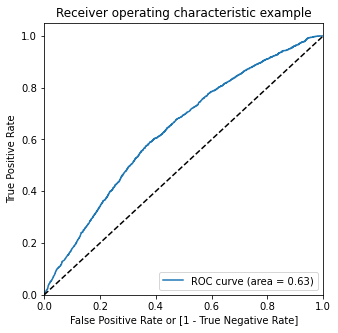

In [321]:
draw_roc(y_train_pred_final.Submitted, y_train_pred_final.Submitted_Prob)

In [322]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Submitted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0   0.50418  0.730321  0.454095
0.1   0.1   0.50418  0.730321  0.454095
0.2   0.2   0.50418  0.730321  0.454095
0.3   0.3   0.50418  0.730321  0.454095
0.4   0.4   0.50418  0.730321  0.454095
0.5   0.5   0.50418  0.730321  0.454095
0.6   0.6   0.50418  0.730321  0.454095
0.7   0.7   0.50418  0.730321  0.454095
0.8   0.8   0.50418  0.730321  0.454095
0.9   0.9   0.50418  0.730321  0.454095


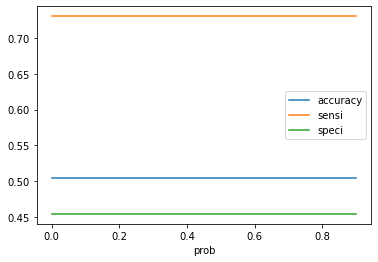

In [323]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

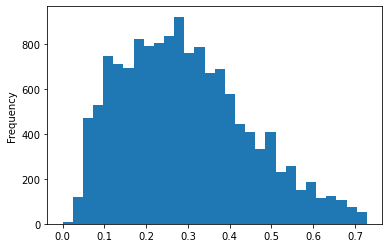

In [131]:
ax = y_train_pred_final['Submitted_Prob'].plot.hist(bins=30)

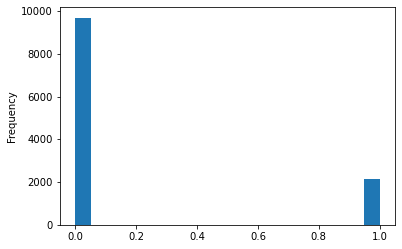

In [324]:
ax = y_train_pred_final['Submitted'].plot.hist(bins=20)

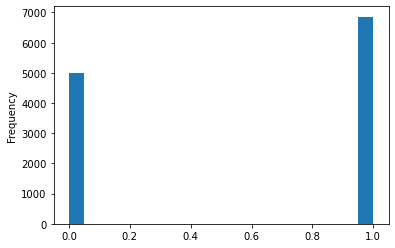

In [325]:
ax = y_train_pred_final['predicted'].plot.hist(bins=20)

In [440]:
#y_train_pred_final.to_csv('Sub_probmm4-11.csv', index = True)

In [326]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.744


In [327]:
#  Logistic regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [328]:
accuracy_logreg = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

Cross Validation Scores for Log Reg: [0.5        0.49990983 0.49990983 0.50009017 0.50009017]
Mean Accuracy Score for Log Reg: 0.5



In [329]:
accuracy_score(y_test,y_pred, normalize=True) * 100

82.14778325123153

In [330]:
print("Training score:", model.score(X_train, y_train))

Training score: 0.8186808546575458


In [331]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(model,  X, y, scoring=scoring, cv=5, 
                        return_train_score=False)

In [332]:
scores

{'fit_time': array([0.06399322, 0.0679996 , 0.04200315, 0.04699922, 0.04099607]),
 'score_time': array([0.01300693, 0.01100087, 0.01200056, 0.00800586, 0.01000214]),
 'test_acc': array([0.5       , 0.49990983, 0.49990983, 0.50009017, 0.50009017]),
 'test_prec': array([0., 0., 0., 0., 0.]),
 'test_rec': array([0., 0., 0., 0., 0.]),
 'test_f1': array([0., 0., 0., 0., 0.])}

In [343]:
KNN_model = KNeighborsClassifier()

In [344]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.68391634 0.68187556 0.69792606 0.69395852 0.69107304]
Mean Accuracy Score for KNN: 0.6897499038291759


In [345]:
param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 1}
Best Cross Vlidation Score: 0.7017963571825053


In [346]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None],
             'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 6, 'splitter': 'best'}

In [347]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'],
                                       criterion= grid_search.best_params_['criterion'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=6)

In [348]:
y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 64.63402904684044
Out-of-sample Accuracy: 64.41142527409117


In [349]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix
[[2311 1126]
 [1341 2154]]
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      3437
           1       0.66      0.62      0.64      3495

    accuracy                           0.64      6932
   macro avg       0.64      0.64      0.64      6932
weighted avg       0.64      0.64      0.64      6932



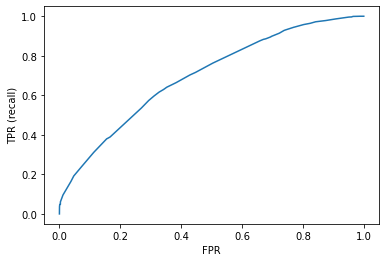

In [350]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [351]:
y_pred_prob =model.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

In [352]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

AUC for logreg: 0.698


In [466]:
#from sklearn.model_selection import cross_val_score
#cv_scores = cross_val_score(model,X,y, cv=5, scoring='roc_auc')
#print(cv_scores)

In [353]:
feature_names = X = LeadScore_df.drop('Is_Submitted', axis =1)

In [354]:
#print(feature_names)
model.feature_importances_

array([0.08838449, 0.09577732, 0.09437415, 0.07252294, 0.13361159,
       0.03582488, 0.24016068, 0.23934396])

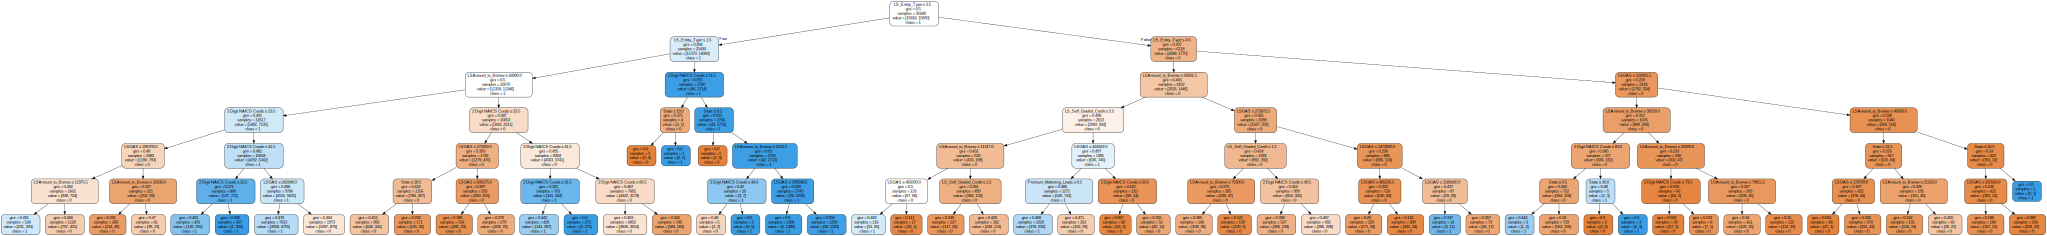

<Figure size 1440x1080 with 0 Axes>

In [120]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(20,15))

class_names = ['0', '1']
feature_names = X.columns

dot_data = tree.export_graphviz(model, 
                  feature_names=feature_names, 
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)
                           
graph = graphviz.Source(dot_data)
graph

In [108]:
#graph.render("decision_treeLeadN_graphviz")
#'decision_treeLeadN_graphviz.png'

In [355]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()

,Feature_Importance
Web_Ad_Outlet__c,0.240161
Web_Ad_Outlet_Source__c,0.239344
LS_Self_Graded_Credit,0.133612
Email_Domain,0.095777
LS_Amount_to_Borrow,0.094374


In [155]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100
print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 92.76729559748428
Out-of-sample Accuracy: 80.10291595197255


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [148]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [149]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5817929358673957


In [ ]:
#len(CreditRisk_merge['contract_number'].unique())